In [1]:
#Instructions:
#Sign up to kaggle
#go to accounts page and download kaggle api(.jason file)
#import kaggle to Anaconda 
    #.\pip install kaggle  =>go to Anaconda folder and find pip.exe
#comment rest.py line 234,235(as anaconda python3 is not supported)
    #path : C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\Lib\site-packages\kaggle\rest.py

#If college network : Allow kaggle.com to sign in manually and run the notebook.
#The link used for data set is:
 #https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
from zipfile import ZipFile
import io
import matplotlib.pyplot as plt
%matplotlib inline

#replace with your own credentials. Can be found in kaggle.json downloaded from Account page of kaggle.com
username = "subbu1996"
key = "93ce57d81daccf52a7c36d217394d727"

api = KaggleApi({"username":username,"key":key}) 
api.authenticate()        

#https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017
#owner_slug is the creator of that dataset. Its not the actual name of the creator. Its the username.
#dataset_slug is the dataset created by that perticular used above in owner_slug

owner_slug = "martj42"
dataset_slug = "international-football-results-from-1872-to-2017"

file = api.datasets_download(owner_slug = owner_slug,dataset_slug = dataset_slug)  
#file_withname = api.datasets_download_file(owner_slug = "martj42",dataset_slug = "international-football-results-from-1872-to-2017",file_name = "results.csv") 

with ZipFile(io.BytesIO(file)) as thezip:
    for zipinfo in thezip.infolist():
        with thezip.open(zipinfo) as thefile:
            #print(zipinfo.filename, thefile)
            df = pd.read_csv(thefile)
            df['date'] = pd.to_datetime(df['date'])
            df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
            winLose = df["home_score"]-df["away_score"]

            # new columns are home_win, away_win, tie
            df["home_win"] = winLose[winLose > 0]
            df["away_win"] = winLose[winLose < 0] 
            df["tie"] = winLose[winLose == 0]

            # if true, value is 1, else value is 0
            df.loc[df["home_win"] > 0,"home_win"] = 1
            df.loc[df["away_win"] < 0,"away_win"] = 1
            df.loc[df["tie"] == 0,"tie"] = 1
            df = df.fillna(0)
            print(df.head(10))


        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
5 1876-03-25  Scotland     Wales           4           0   Friendly  Glasgow   
6 1877-03-03   England  Scotland           1           3   Friendly   London   
7 1877-03-05     Wales  Scotland           0           2   Friendly  Wrexham   
8 1878-03-02  Scotland   England           7           2   Friendly  Glasgow   
9 1878-03-23  Scotland     Wales           9           0   Friendly  Glasgow   

    country  neutral  year  month  home_win  away_win  tie  
0  Scotland    False  1872     11       0.0       0.0  1.0

In [3]:
#In the above piece of code we logged into kaggle.com, using the kaggleApi with valid username and key.
#Downloaded the dataset zipfile atomatically and converted into csv to process.
#Owner slug and dataset slug should be matched.

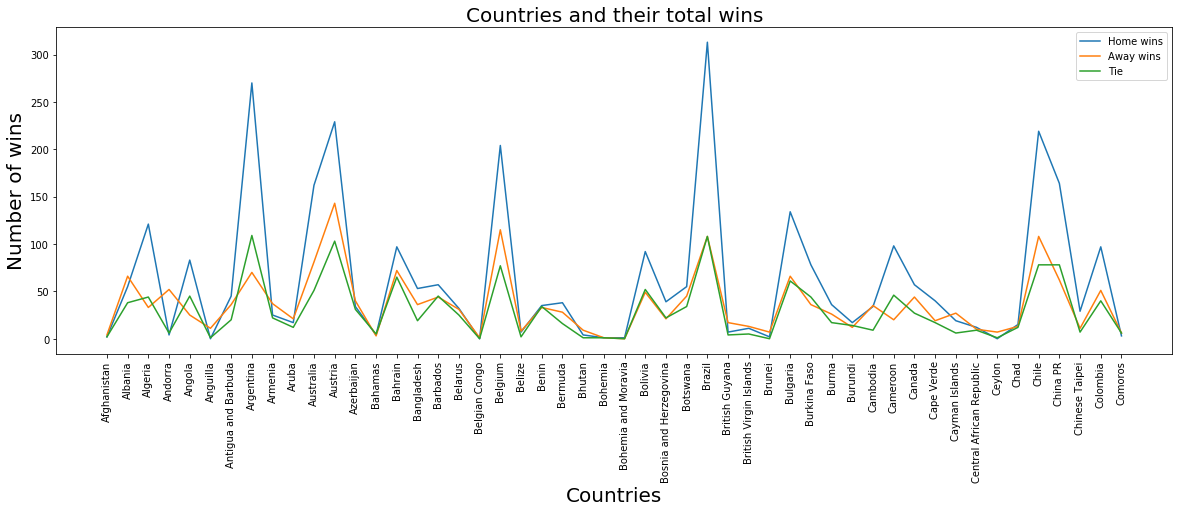

In [4]:
plt.figure(figsize=(20,6)) #(60,6) for all
#print("Countries participated:")
#print(df["country"].nunique())
df_home_win = df["home_win"].groupby(df["country"]).sum()
df_away_win = df["away_win"].groupby(df["country"]).sum()
df_tie = df["tie"].groupby(df["country"]).sum()
plt.plot(df_home_win[:50]) 
plt.plot(df_away_win[:50])
plt.plot(df_tie[:50])
plt.title("Countries and their total wins",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Number of wins",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home wins","Away wins","Tie"])
plt.show()

In [ ]:
#The above graph displays the total number of wins for a particular country when in home country and also away from home country
#for the years 1872 to 2017.
#If we analyse the graphs we can see that the perfomance of any contry is better when played at their home country.
#A random of 50 contries were chosen to display the data.

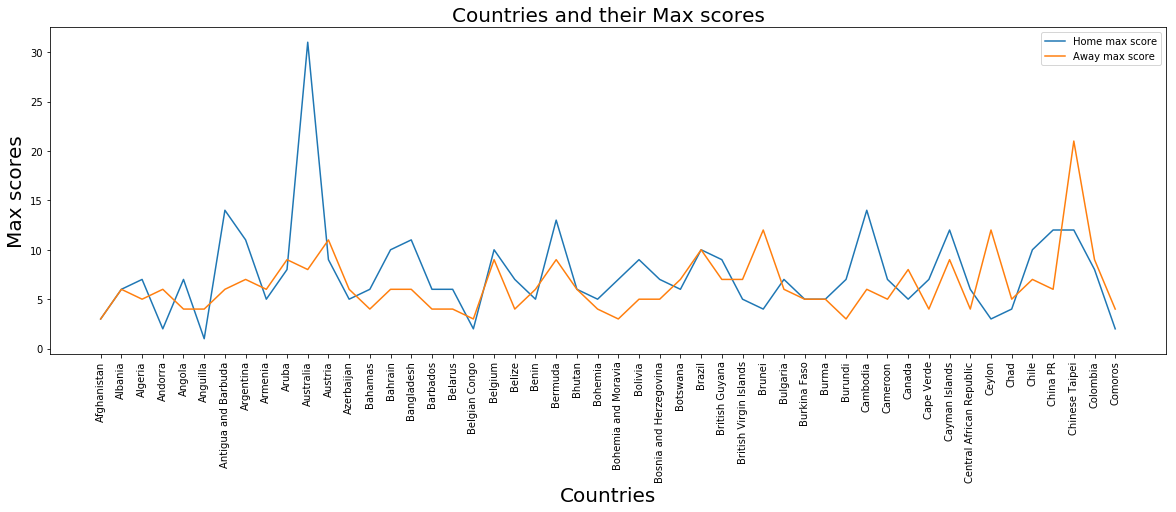

In [6]:
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_max = df["home_score"].groupby(df["country"]).max()
df_away_max = df["away_score"].groupby(df["country"]).max()
plt.plot(df_home_max[:50]) 
plt.plot(df_away_max[:50])
plt.title("Countries and their Max scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Max scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home max score","Away max score"])
plt.show()

In [7]:
#The above graph displays the MAX scores for a particular country when in home country and also away from home country.
#If we analyse the graphs we can see it's a mixed result means that few contries scored max at their home place and few 
#others performed well far away from their home contry.
#A random of 50 contries were chosen to display the data. 

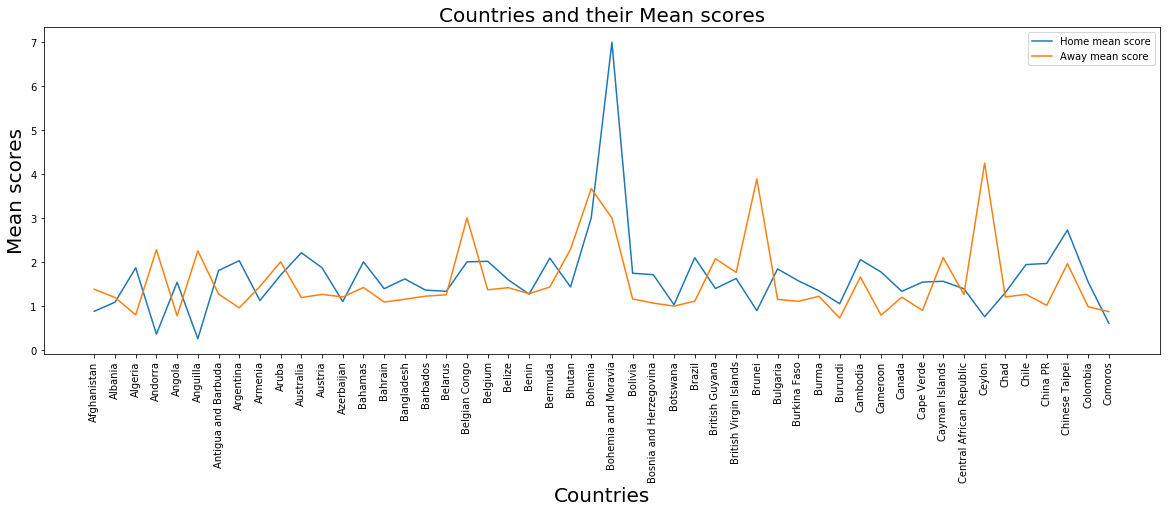

In [8]:
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_mean = df["home_score"].groupby(df["country"]).mean()
df_away_mean = df["away_score"].groupby(df["country"]).mean()
plt.plot(df_home_mean[:50]) 
plt.plot(df_away_mean[:50])
plt.title("Countries and their Mean scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Mean scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home mean score","Away mean score"])
plt.show()

In [9]:
#The above graph displays the average scores for a particular country when in home country and also away from home country.
#If we analyse the graphs we can see the average is very low. This is due to the fact: in most of the matches,the scores are 
#around 0 or 1 #If we consider only the matches with score not equal to zero the average will be somewhat high.

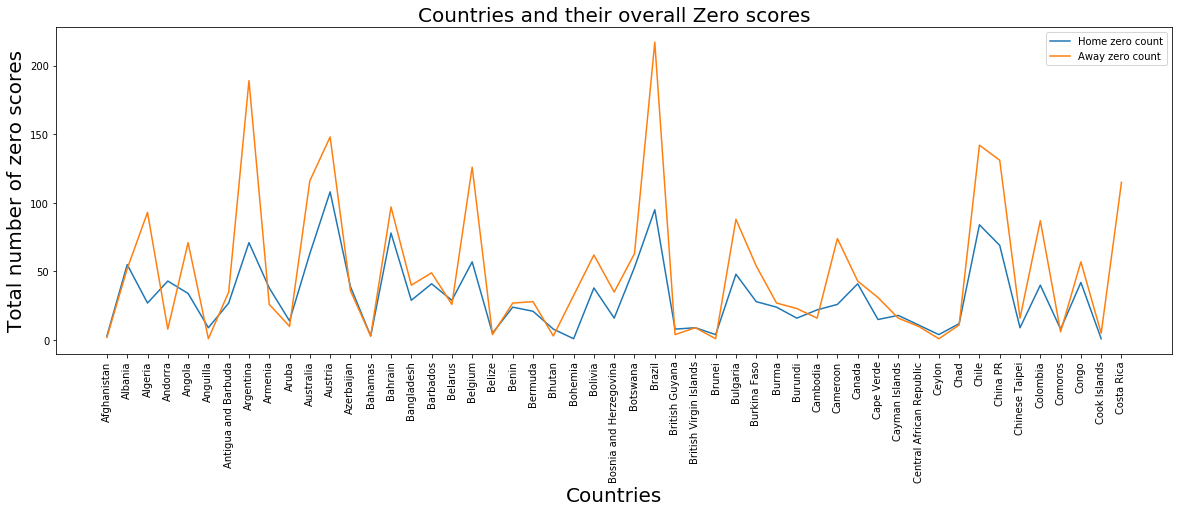

In [14]:
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_zero = df[df["home_score"]==0].groupby(df["country"]).count()
df_away_zero = df[df["away_score"]==0].groupby(df["country"]).count()
plt.plot(df_home_zero['home_score'][:50]) 
plt.plot(df_away_zero['home_score'][:50])
plt.title("Countries and their overall Zero scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Total number of zero scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home zero count","Away zero count"])
plt.show()

In [11]:
#This graph is a kind of proof to the above mentioned scenario. Here we can see so many contries are having more number zero 
#scores. Also we can see more of zero scores when played far from home town.
 

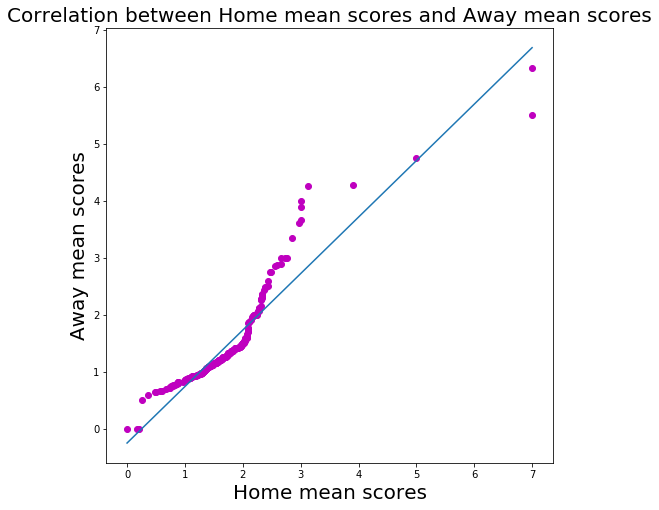

In [12]:
plt.figure(figsize=(8,8))
df_home_mean_sort = df_home_mean.sort_values(ascending=False)
df_away_mean_sort = df_away_mean.sort_values(ascending=False)
plt.scatter(df_home_mean_sort,df_away_mean_sort,c='m')
plt.title("Correlation between Home mean scores and Away mean scores",size = 20)
plt.xlabel("Home mean scores",size = 20)
plt.ylabel("Away mean scores",size = 20)
z = np.polyfit(df_home_mean_sort,df_away_mean_sort,1)
p = np.poly1d(z)
plt.plot(df_home_mean_sort,p(df_home_mean_sort))
plt.show()

In [ ]:
#The above graph shows Correlation between Home mean scores and Away mean scores. 
#The straight line represents the least square regression line.

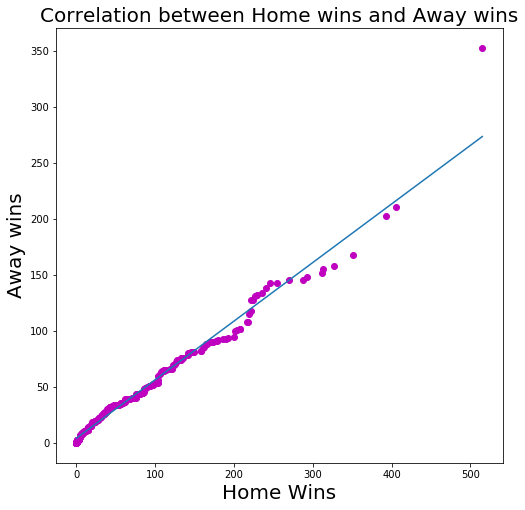

In [13]:
plt.figure(figsize=(8,8))
df_home_win_sort = df_home_win.sort_values(ascending=False)
df_away_win_sort = df_away_win.sort_values(ascending=False)
plt.scatter(df_home_win_sort,df_away_win_sort,c='m')
plt.title("Correlation between Home wins and Away wins",size = 20)
plt.xlabel("Home Wins",size = 20)
plt.ylabel("Away wins",size = 20)
z = np.polyfit(df_home_win_sort,df_away_win_sort,1)
p = np.poly1d(z)
plt.plot(df_home_win_sort,p(df_home_win_sort))
plt.show()

In [ ]:
#The above graph shows Correlation between Home wins and Away wins. 
#The straight line represents the least square regression line.
#Home country wins are more than away home.